**Import Packages**


In [19]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import numpy as np

**Parameters**


In [20]:
N = 50  # Define here the population size
genome = 4  # Define here the chromosome length
generation_max = 15  # Define here the maximum number of generations/iterations

**Init Quantum Population**


In [21]:
# Initialize quantum circuit and classical register
qc = QuantumCircuit(genome, genome)

**Select Parents**


In [22]:
# Example fitness function
def fitness_function(x):
    return abs(x - 5 / 2 + np.sin(x))

**Genetic Quantum Algorithm**


In [23]:
for generation in range(generation_max):
    print(f"= GENERATION: {generation} =")

    # Reset quantum circuit
    qc.reset(range(genome))

    # Randomize initial states using Hadamard gate
    for qubit in range(genome):
        if np.random.rand() < 0.5:
            qc.h(qubit)  # Apply Hadamard gate with 50% probability

    # Measure and evaluate fitness
    qc.measure(range(genome), range(genome))
    sim = Aer.get_backend("qasm_simulator")
    result = sim.run(transpile(qc, sim)).result()
    counts = result.get_counts()

    fitness_values = {
        binary_string: fitness_function(int(binary_string, 2))
        for binary_string in counts.keys()
    }
    # Select top N individuals based on fitness
    selected_strings = sorted(
        fitness_values.keys(), key=lambda x: fitness_values[x], reverse=True
    )[:N]

    # Update quantum circuit for selected individuals
    qc.reset(range(genome))
    for binary_string in selected_strings:
        for idx, bit in enumerate(binary_string):
            if bit == "1":
                qc.x(idx)  # Apply X-gate for '1' bits
        qc.h(range(genome))  # Apply Hadamard gate for randomization

    print("Selected Individuals:")
    for binary_string in selected_strings:
        print(
            "Binary String:", binary_string, "Fitness:", fitness_values[binary_string]
        )

= GENERATION: 0 =
Selected Individuals:
Binary String: 0000 Fitness: 2.5
Binary String: 0010 Fitness: 0.4092974268256817
= GENERATION: 1 =
Selected Individuals:
Binary String: 0000 Fitness: 2.5
Binary String: 0101 Fitness: 1.5410757253368614
Binary String: 0100 Fitness: 0.7431975046920718
Binary String: 0001 Fitness: 0.6585290151921035
= GENERATION: 2 =
Selected Individuals:
Binary String: 0000 Fitness: 2.5
Binary String: 0001 Fitness: 0.6585290151921035
Binary String: 0011 Fitness: 0.6411200080598672
Binary String: 0010 Fitness: 0.4092974268256817
= GENERATION: 3 =
Selected Individuals:
Binary String: 0000 Fitness: 2.5
Binary String: 0100 Fitness: 0.7431975046920718
= GENERATION: 4 =
Selected Individuals:
Binary String: 1101 Fitness: 10.92016703682664
Binary String: 1100 Fitness: 8.963427081999566
Binary String: 1001 Fitness: 6.9121184852417565
Binary String: 1000 Fitness: 6.4893582466233815
Binary String: 0000 Fitness: 2.5
Binary String: 0101 Fitness: 1.5410757253368614
Binary String

Selected Individuals:
Binary String: 1100 Fitness: 8.963427081999566
Binary String: 1000 Fitness: 6.4893582466233815
Binary String: 0000 Fitness: 2.5
Binary String: 0100 Fitness: 0.7431975046920718
= GENERATION: 9 =
Selected Individuals:
Binary String: 0110 Fitness: 3.220584501801074
Binary String: 0000 Fitness: 2.5
Binary String: 0100 Fitness: 0.7431975046920718
Binary String: 0010 Fitness: 0.4092974268256817
= GENERATION: 10 =
Selected Individuals:
Binary String: 1101 Fitness: 10.92016703682664
Binary String: 1100 Fitness: 8.963427081999566
Binary String: 1001 Fitness: 6.9121184852417565
Binary String: 1000 Fitness: 6.4893582466233815
Binary String: 0000 Fitness: 2.5
Binary String: 0101 Fitness: 1.5410757253368614
Binary String: 0100 Fitness: 0.7431975046920718
Binary String: 0001 Fitness: 0.6585290151921035
= GENERATION: 11 =
Selected Individuals:
Binary String: 0000 Fitness: 2.5
Binary String: 0101 Fitness: 1.5410757253368614
Binary String: 0100 Fitness: 0.7431975046920718
Binary S

**Get Best Individual Per Generation**

/tmp/ipykernel_61863/3784628185.py:5: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


Final Results:
{'0110': 1024}


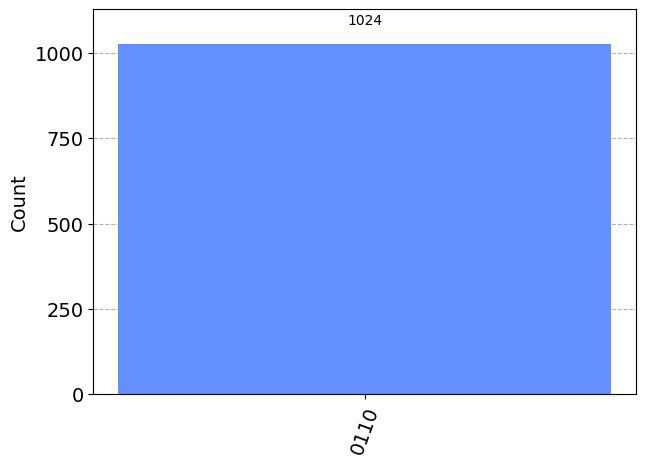

In [24]:
qc.measure(range(genome), range(genome))
simulator = Aer.get_backend("qasm_simulator")
compiled_qc = transpile(qc, simulator)
qobj = assemble(compiled_qc)
result = simulator.run(qobj).result()
counts = result.get_counts()
print("Final Results:")
print(counts)
plot_histogram(counts)